## 1. Data Collection

In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np

# Load the dataset
data = pd.read_csv('data/creditcard.csv') 
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## 2. Data Preprocessing

In [3]:
# Checking for missing values
print(data.isnull().sum())

# Handling missing values (if any)
# In this dataset, there are no missing values, but if there were, you could use:
data.fillna(data.mean(), inplace=True)

# Check the balance of the dataset
print(data['Class'].value_counts())

# Balancing the dataset if needed using under-sampling or over-sampling
from imblearn.under_sampling import RandomUnderSampler

# Define the undersampling method
undersample = RandomUnderSampler(sampling_strategy=1)

# Fit and apply the transform
X = data.drop('Class', axis=1)
y = data['Class']
X_over, y_over = undersample.fit_resample(X, y)

# Create a balanced dataframe
balanced_data = pd.concat([X_over, y_over], axis=1)


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64
Class
0    284315
1       492
Name: count, dtype: int64


## 3. Exploratory Data Analysis (EDA)

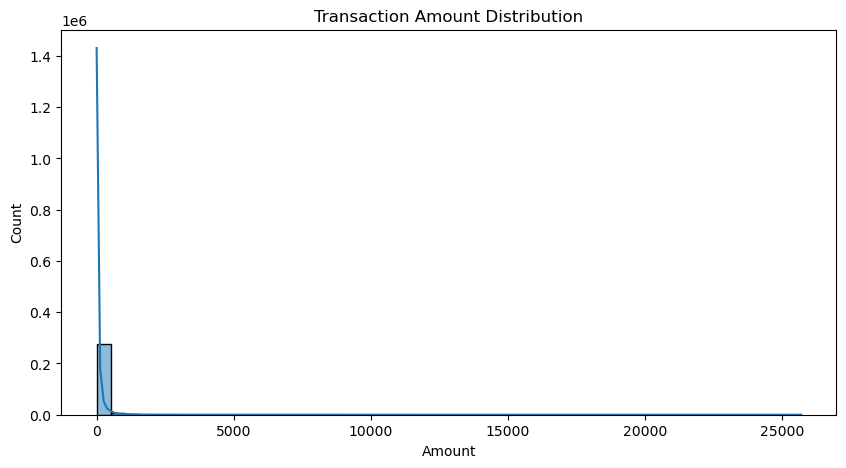

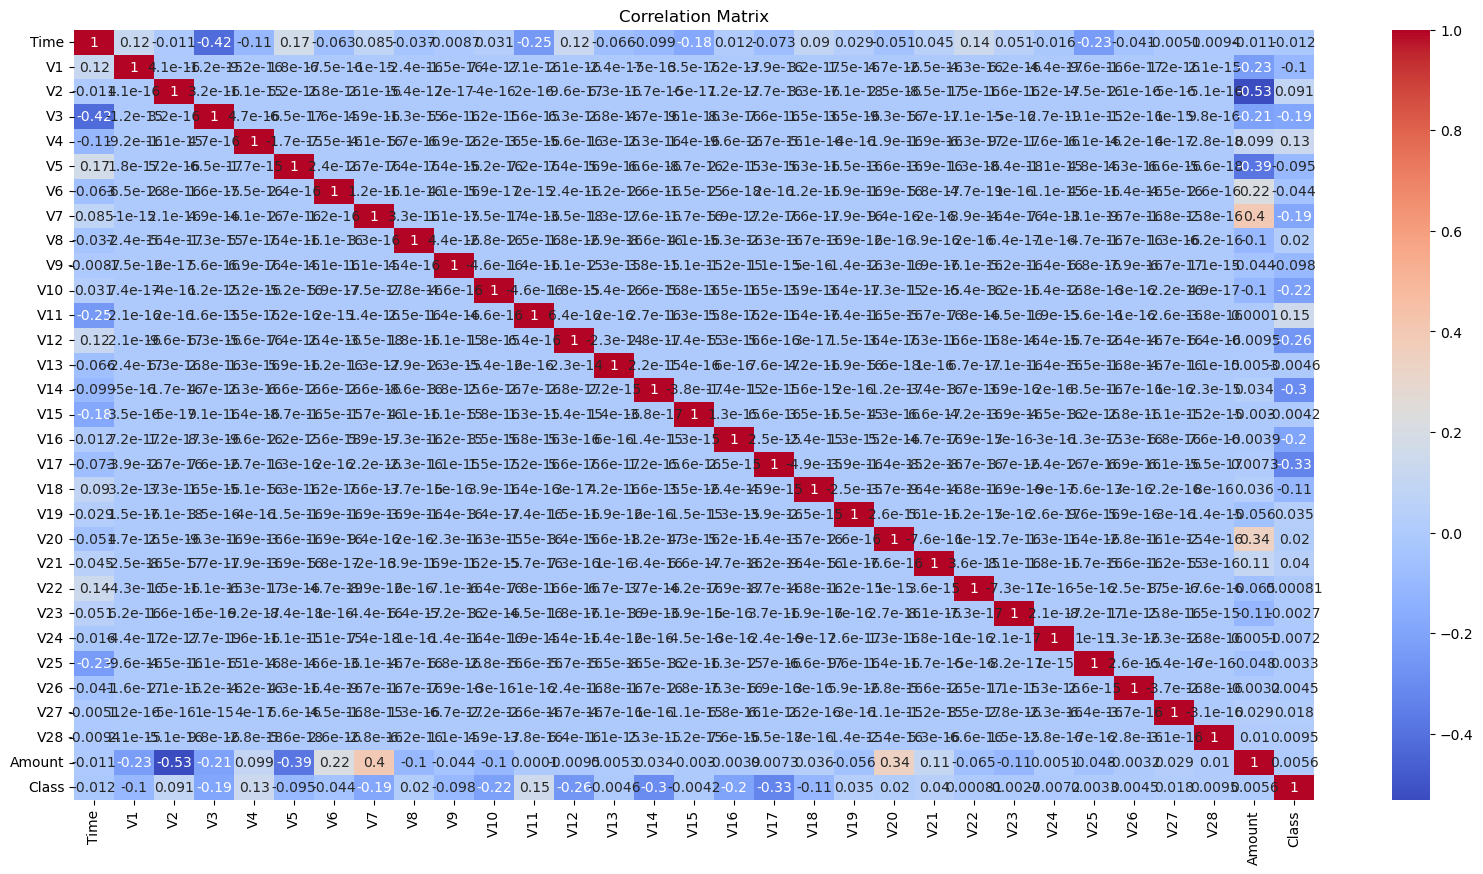

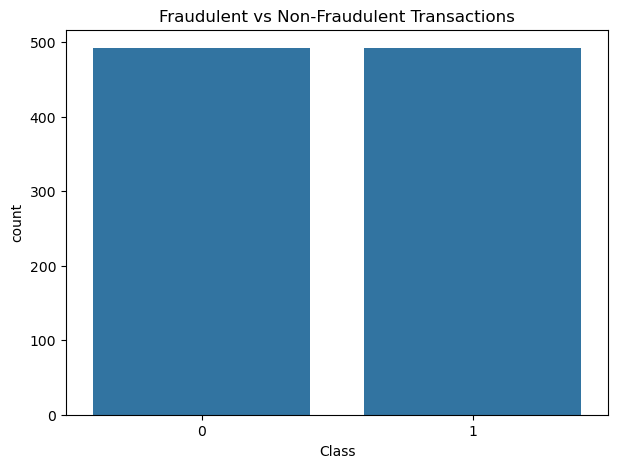

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of transaction amounts
plt.figure(figsize=(10,5))
sns.histplot(data['Amount'], bins=50, kde=True)
plt.title('Transaction Amount Distribution')
plt.show()

# Visualize the correlation matrix
plt.figure(figsize=(20,10))
corr = data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Visualize the count of fraudulent vs non-fraudulent transactions
plt.figure(figsize=(7,5))
sns.countplot(x='Class', data=balanced_data)
plt.title('Fraudulent vs Non-Fraudulent Transactions')
plt.show()

## 4.  Model Selection

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.3, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model 1: Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

## 5.Model Training

In [6]:
# Training Random Forest is done in the previous step

# Model 2: Neural Network
nn_model = Sequential()
nn_model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
nn_model.add(Dense(16, activation='relu'))
nn_model.add(Dense(1, activation='sigmoid'))

nn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
nn_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

nn_preds = (nn_model.predict(X_test) > 0.5).astype("int32")


Epoch 1/10


c:\Users\DANIEL\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5053 - loss: 0.7214 - val_accuracy: 0.5217 - val_loss: 0.6096
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7078 - loss: 0.5293 - val_accuracy: 0.9130 - val_loss: 0.4862
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8985 - loss: 0.4434 - val_accuracy: 0.9058 - val_loss: 0.4203
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9050 - loss: 0.3865 - val_accuracy: 0.9058 - val_loss: 0.3673
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9131 - loss: 0.3382 - val_accuracy: 0.9130 - val_loss: 0.3233
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9222 - loss: 0.2889 - val_accuracy: 0.8986 - val_loss: 0.2909
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9234 - loss: 0.2626 - val_accuracy: 0.8986 - val_loss: 0.2658
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9236 - loss: 0.2408 - val_accuracy: 0.9130 - val_loss: 0.2436
Ep

## 6. Model Evaluation

In [7]:
# Random Forest evaluation
rf_accuracy = accuracy_score(y_test, rf_preds)
rf_precision = precision_score(y_test, rf_preds)
rf_recall = recall_score(y_test, rf_preds)
rf_f1 = f1_score(y_test, rf_preds)

print(f'Random Forest - Accuracy: {rf_accuracy}, Precision: {rf_precision}, Recall: {rf_recall}, F1 Score: {rf_f1}')

# Neural Network evaluation
nn_accuracy = accuracy_score(y_test, nn_preds)
nn_precision = precision_score(y_test, nn_preds)
nn_recall = recall_score(y_test, nn_preds)
nn_f1 = f1_score(y_test, nn_preds)

print(f'Neural Network - Accuracy: {nn_accuracy}, Precision: {nn_precision}, Recall: {nn_recall}, F1 Score: {nn_f1}')


Random Forest - Accuracy: 0.9324324324324325, Precision: 0.9632352941176471, Recall: 0.8972602739726028, F1 Score: 0.9290780141843972
Neural Network - Accuracy: 0.9222972972972973, Precision: 1.0, Recall: 0.8424657534246576, F1 Score: 0.9144981412639405
